Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Load the data sets- train and test 
train_df = pd.read_csv("/home/user/Downloads/train.csv")
test_df = pd.read_csv("/home/user/Downloads/train.csv")
train_df.shape


(891, 12)

In [3]:
#Look at top values of train data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the column names of train data
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#Print the dimension of train and test data
train_df.shape

(891, 12)

In [8]:
#Print the number of missing values in each column of train and test data
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

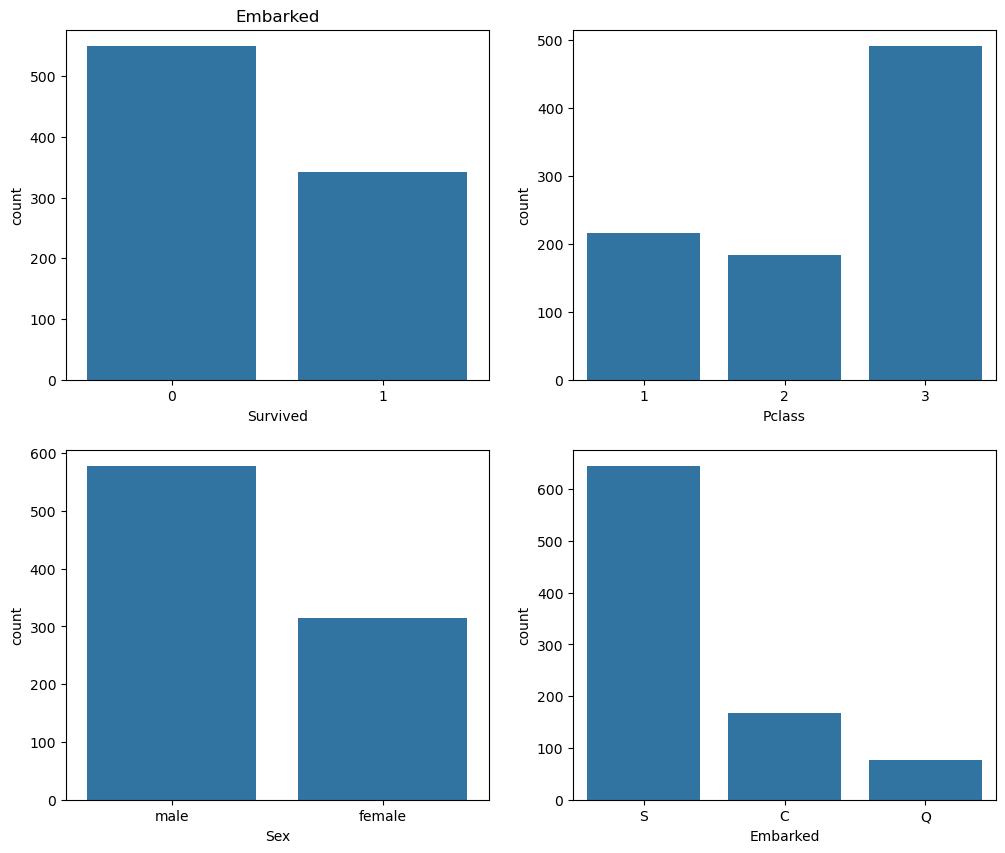

In [16]:
#Barchart of Survived, Pclass, Sex, Embarked
import seaborn as sns
fig,axes = plt.subplots(2,2,figsize=(12,10))
sns.countplot(x="Survived",data=train_df,ax=axes[0,0])
axes[0,0].set_title("survived ")
sns.countplot(x="Pclass",data=train_df,ax=axes[0,1])
axes[0,0].set_title("Pclass")
sns.countplot(x="Sex",data=train_df,ax=axes[1,0])
axes[0,0].set_title("Sex")
sns.countplot(x="Embarked",data=train_df,ax=axes[1,1])
axes[0,0].set_title("Embarked")
plt.show()

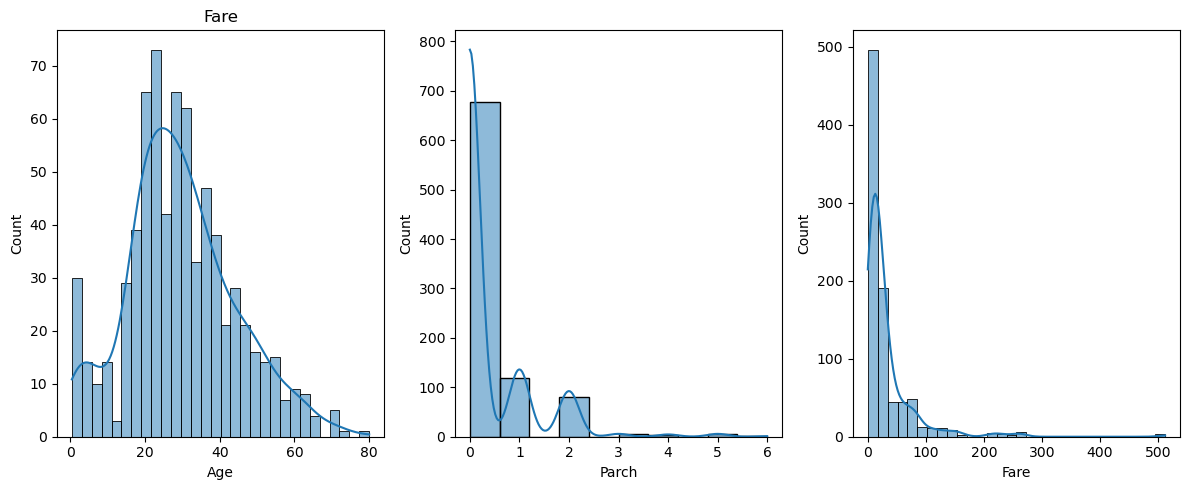

In [17]:
#Histogram of Age, Parch, Fare
fig,axes = plt.subplots(1,3,figsize=(12,5))
sns.histplot(train_df["Age"],bins=30,kde=True,ax=axes[0])
axes[0].set_title("Age")
sns.histplot(train_df["Parch"],bins=10,kde=True,ax=axes[1])
axes[0].set_title("Parch")
sns.histplot(train_df["Fare"],bins=30,kde=True,ax=axes[2])
axes[0].set_title("Fare")
plt.tight_layout()
plt.show()

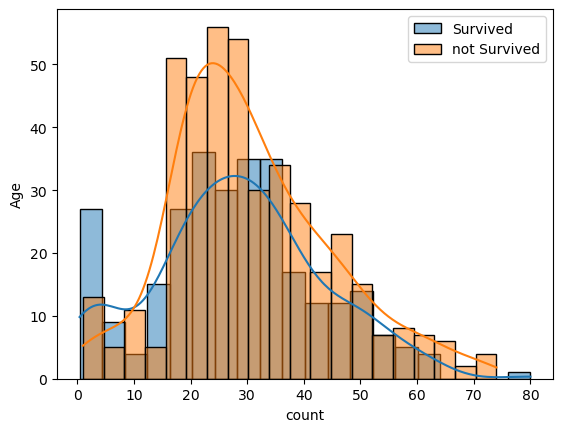

In [20]:
#Plot histogram of age for survived and did not survived class
fig = figsize=(12,8)
sns.histplot(train_df[train_df['Survived']==1]['Age'],bins=20,kde=True,label='Survived')
sns.histplot(train_df[train_df['Survived']==0]['Age'],bins=20,kde=True,label='not Survived')
plt.xlabel("count")
plt.ylabel("Age")
plt.legend()
plt.show()

   Pclass     Sex  Survived
0       1  female  0.968085
1       1    male  0.368852
2       2  female  0.921053
3       2    male  0.157407
4       3  female  0.500000
5       3    male  0.135447


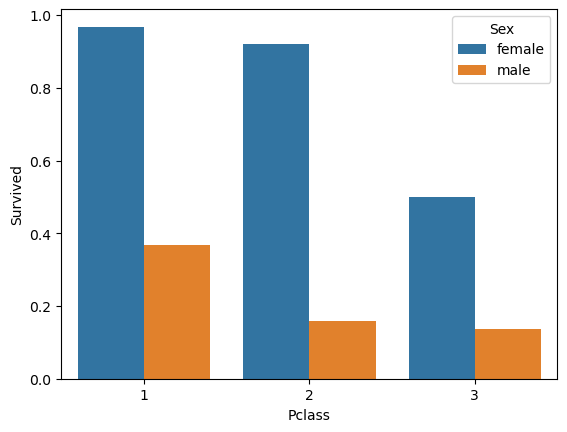

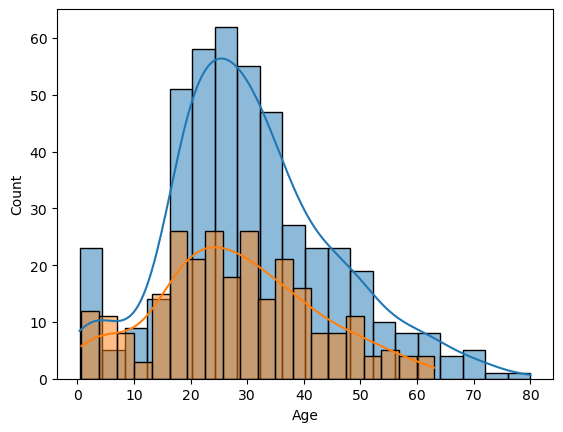

In [19]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
survived = train_df.groupby(['Pclass',"Sex"])['Survived'].mean().reset_index()
print(survived)
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=survived)
plt.show()
sns.histplot(train_df[train_df['Sex']=='male']['Age'],bins=20,kde=True,label='male')
sns.histplot(train_df[train_df['Sex']=='female']['Age'],bins=20,kde=True,label='female')
plt.show()

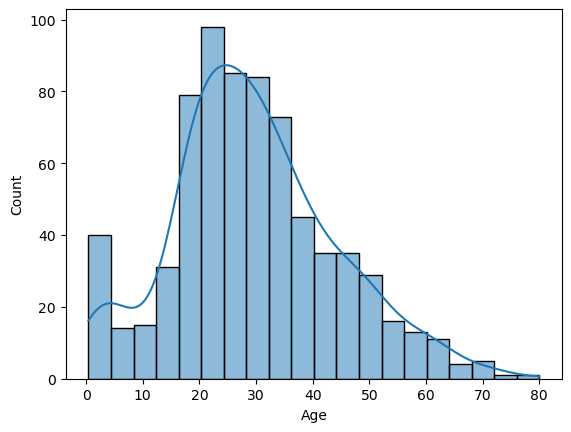

In [38]:
#Histogram of Age of the given data set(sample)
sns.histplot(train_df['Age'],bins=20,kde=True)
plt.tight_layout()
plt.show()

## Handling Missing Values

In [40]:
#Replace the msiing values in Embarked column by 'S'
train_df['Embarked'].fillna("S",inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
#Impute the missing values in Fare column with median value
train_df['Fare'].fillna(train_df['Fare'].mean(),inplace=True)

In [44]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
mean_age = train_df['Age'].mean()
std_age = train_df['Age'].std()
null_count = train_df['Age'].isnull().sum()

random_age = np.random.randint(mean_age - std_age, mean_age + std_age, size=null_count)
train_df.loc[train_df['Age'].isnull(), 'Age'] = random_age

## Feature Engineering - Creating new features

In [45]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] + 1
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,39.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [47]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
train_df['IsAlone'] = (train_df['FamilySize']==1).astype(int)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,39.0,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [51]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
train_df.drop(['PassengerId','Name', 'Ticket','Cabin'],axis=1,inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,2,0
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,1
887,1,1,female,19.0,0,0,30.0000,S,1,1
888,0,3,female,39.0,1,2,23.4500,S,4,0
889,1,1,male,26.0,0,0,30.0000,C,1,1


## Model Building

In [52]:
#Prepare X and y
x=train_df.drop('Survived',axis=1)
y=train_df['Survived']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,male,22.0,1,0,7.2500,S,2,0
1,1,female,38.0,1,0,71.2833,C,2,0
2,3,female,26.0,0,0,7.9250,S,1,1
3,1,female,35.0,1,0,53.1000,S,2,0
4,3,male,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,1,1
887,1,female,19.0,0,0,30.0000,S,1,1
888,3,female,39.0,1,2,23.4500,S,4,0
889,1,male,26.0,0,0,30.0000,C,1,1


In [59]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
columns=x.select_dtypes(include=['object']).columns
labelencoder={}
for col in columns:
 le=LabelEncoder()
 x[col]=le.fit_transform(x[col])
 labelencoder[col]=le

 

In [63]:
# concat df_categorical with original df
df_categorical = x.select_dtypes(include="int")
x=pd.concat([x,df_categorical],axis=1)
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone
0,3,1,22.0,1,0,7.2500,2,2,0,3,1,1,0,2,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,1,0,1,0,0,2,0
2,3,0,26.0,0,0,7.9250,2,1,1,3,0,0,0,2,1,1
3,1,0,35.0,1,0,53.1000,2,2,0,1,0,1,0,2,2,0
4,3,1,35.0,0,0,8.0500,2,1,1,3,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,1,1,2,1,0,0,2,1,1
887,1,0,19.0,0,0,30.0000,2,1,1,1,0,0,0,2,1,1
888,3,0,39.0,1,2,23.4500,2,4,0,3,0,1,2,2,4,0
889,1,1,26.0,0,0,30.0000,0,1,1,1,1,0,0,0,1,1


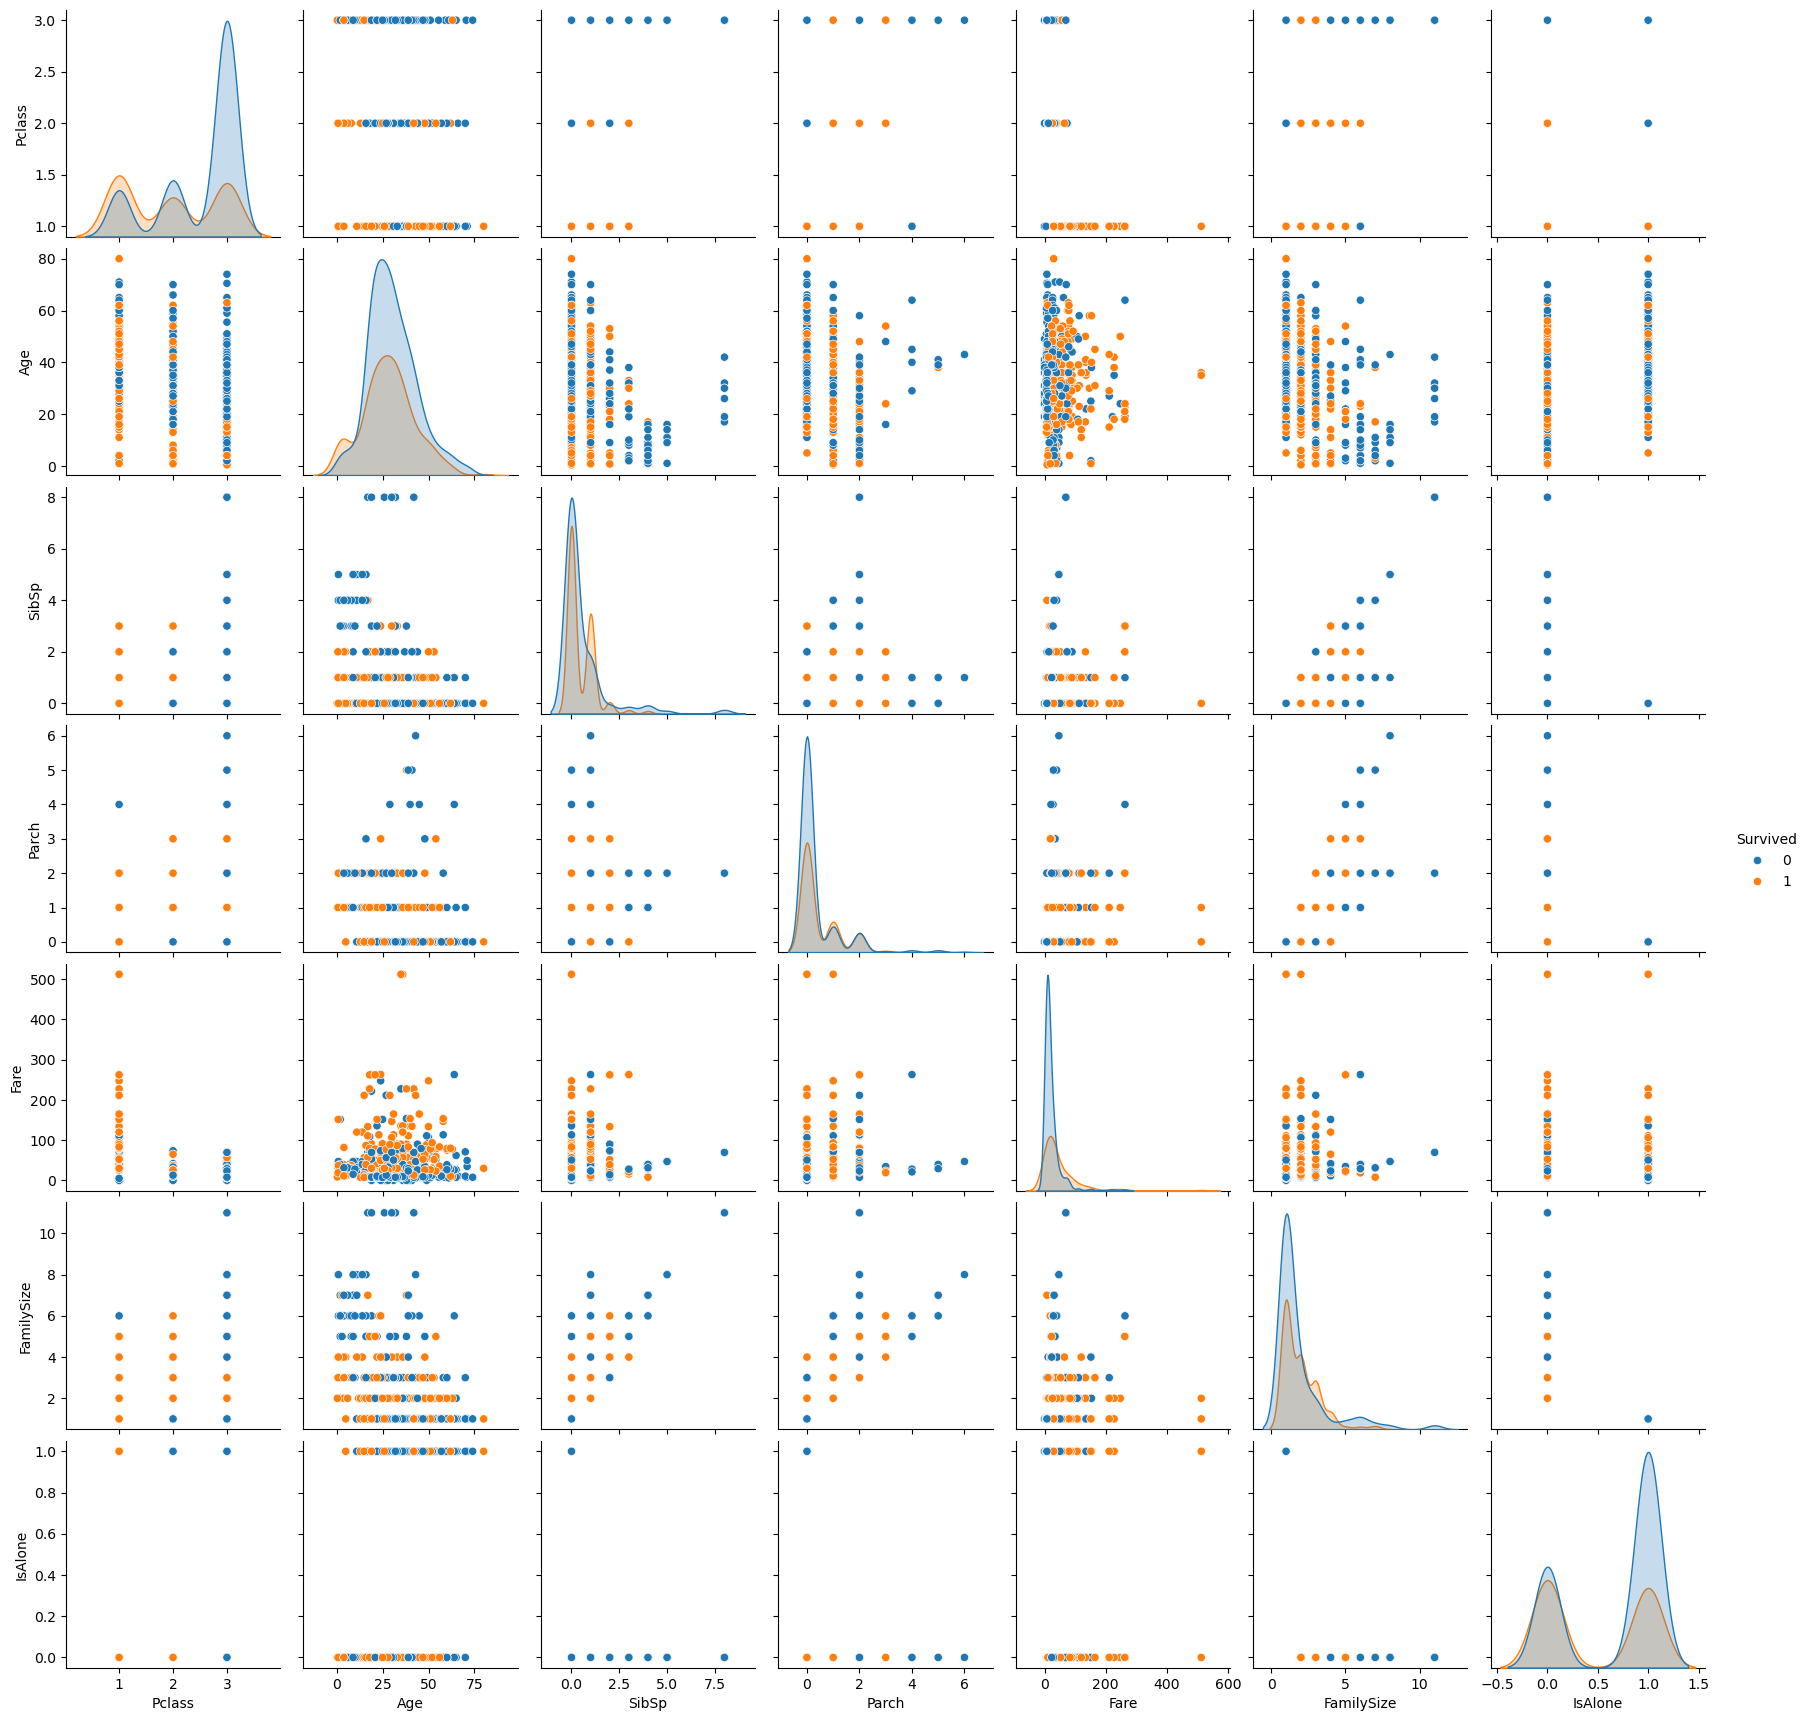

In [67]:
#Do a pairplot of all features
sns.pairplot(train_df,hue="Survived")
plt.show()

In [71]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [89]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

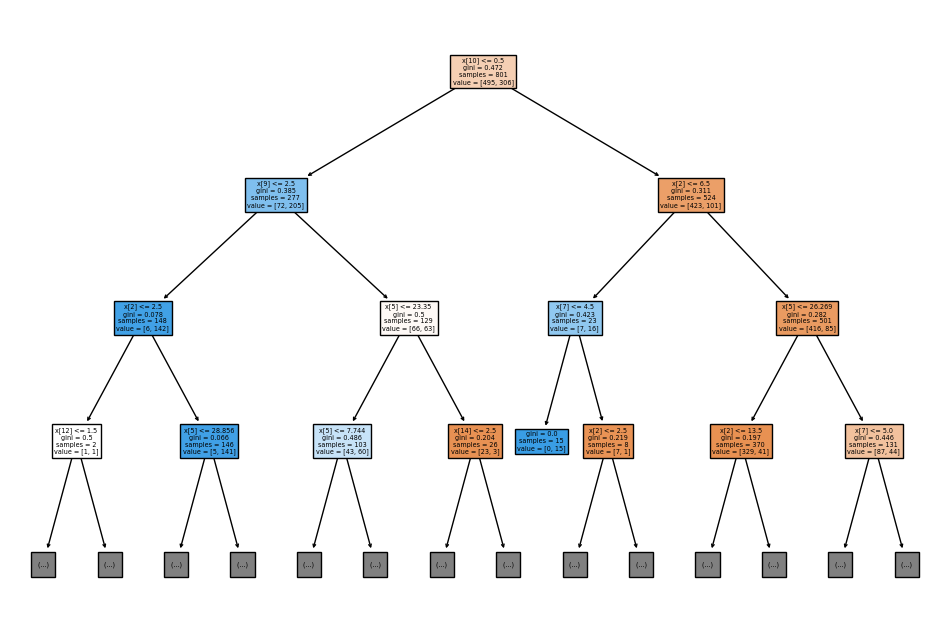

In [91]:
#Print the tree

# Importing required packages for visualization
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True,max_depth=3)
plt.show()

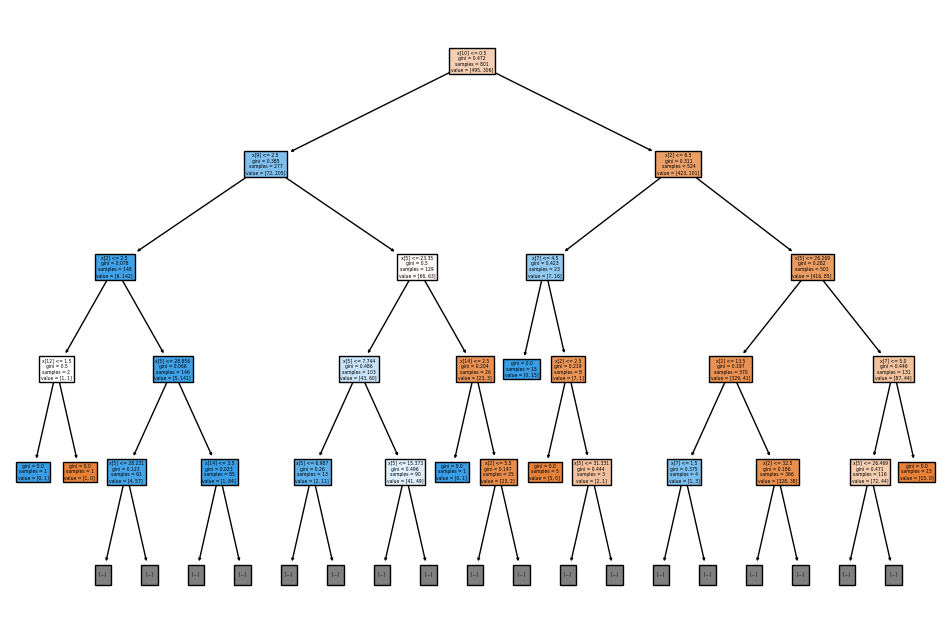

In [92]:
# plotting tree with max_depth=3
plt.figure(figsize=(12,8))
tree.plot_tree(model,max_depth=4,filled=True)
plt.show()

<img src="tree2.png">

In [94]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing classification report and confusion matrix from sklearn metrics
y_pred = model.predict(x_test)

# Making predictions

# Printing classification report
accuracy = accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
print("accuracy:",accuracy)
print("classification:",classification)
print("confusion:",confusion)

accuracy: 0.8111111111111111
classification:               precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.72      0.86      0.78        36

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90

confusion: [[42 12]
 [ 5 31]]


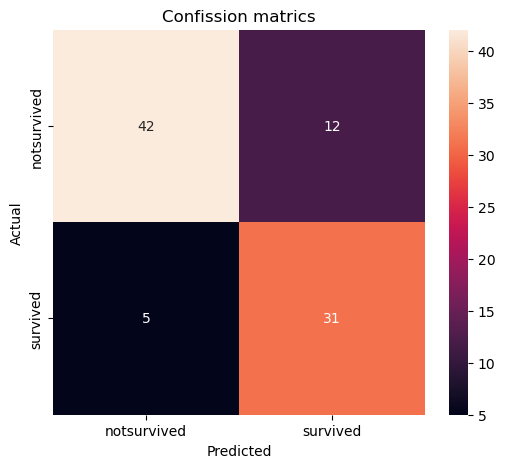

In [99]:
# Printing confusion matrix and accuracy
plt.figure(figsize=(6,5))
sns.heatmap(confusion,annot=True,xticklabels=['notsurvived','survived'],yticklabels=['notsurvived','survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confission matrics")
plt.show()